# Software development patterns through git data mining

In [1]:
import sys, os, getpass, warnings
warnings.filterwarnings('ignore')
from patterns.visualizer import Visualizer

Create a `Visualizer` object for a project, e.g., for Spack, `vis = Visualizer('spack')`. This brings in data from database and annotate it with *locc*, *locc+*, *locc-*, *change-size-cos* = *1-similarity* (**expensive call**). The data is cached locally after it's fetched from the database and subsequently loaded from disk, unless you specify the `cache=False` parameter, e.g., `vis.get_data(cache=False)`. Available projects include `'lammps', 'spack', 'petsc', 'Nek5000', 'nwchem', 'E3SM', 'qmcpack', 'qdpxx'` (the full list can be obtained with by calling the `Visualizer()` constructor without arguments.

The `get_data` method automatically removes changes associated with non-code files. The determination of what is code is made by including common suffixes, as well as checking manually a sampling of ECP projects for the suffixes used for things that can be labeled as code (vs. input simulation data, documentation, or generated files), for a list of suffixes, refer to the `Patterns.code_suffixes` list in [patterns.py](https://github.com/HPCL/ideas-uo/blob/master/src/patterns/patterns.py). This makes the analysis of decades of project data feasible. You can disable this if desired, by passing the `code_only=False` parameter to `get_data`. You can also explicitly remove non-code rows with `vis.remove_noncode()`.

In [2]:
vis = Visualizer(project_name='spack')
vis.get_data()

INFO: Loaded local cached copy of spack data.
INFO: Done computing averages.


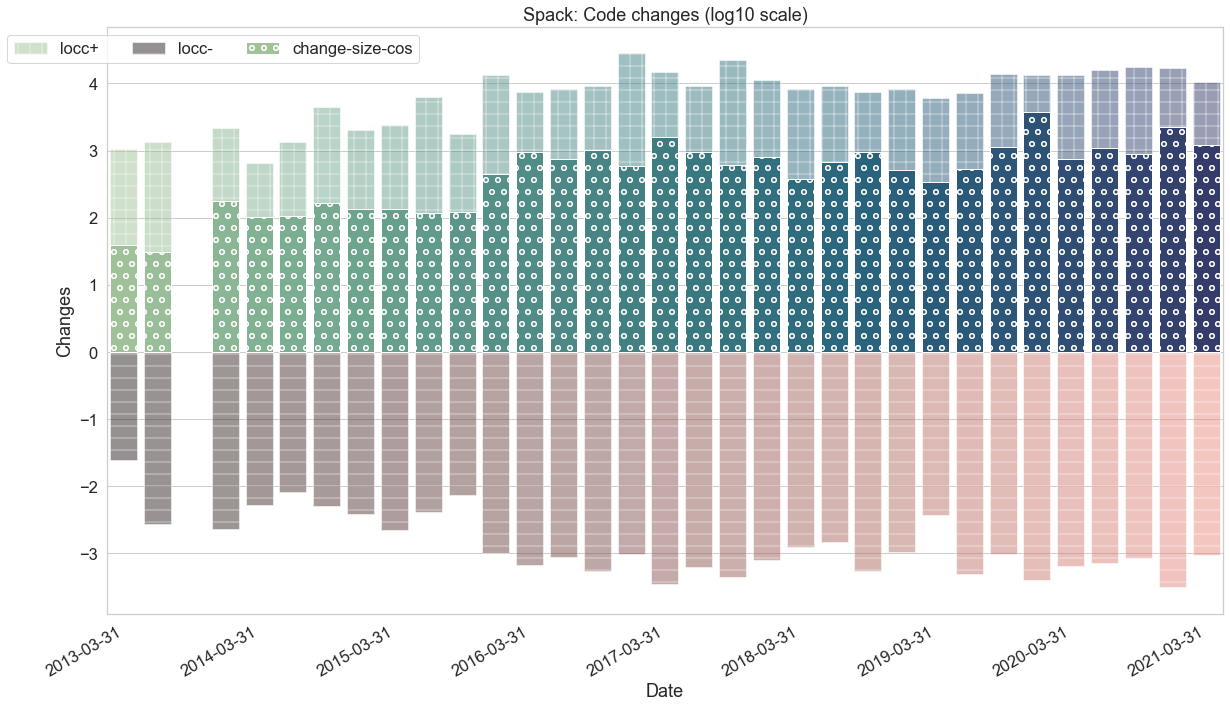

In [3]:
df = vis.plot_overall_project_locc(time_range=None, log=True)

to focus on a given year and/or month, set *year* and *month* fields

In [4]:
vis.set_year(2020)
vis.set_month(7)

to plot for a given year, provide *time_range='year'*

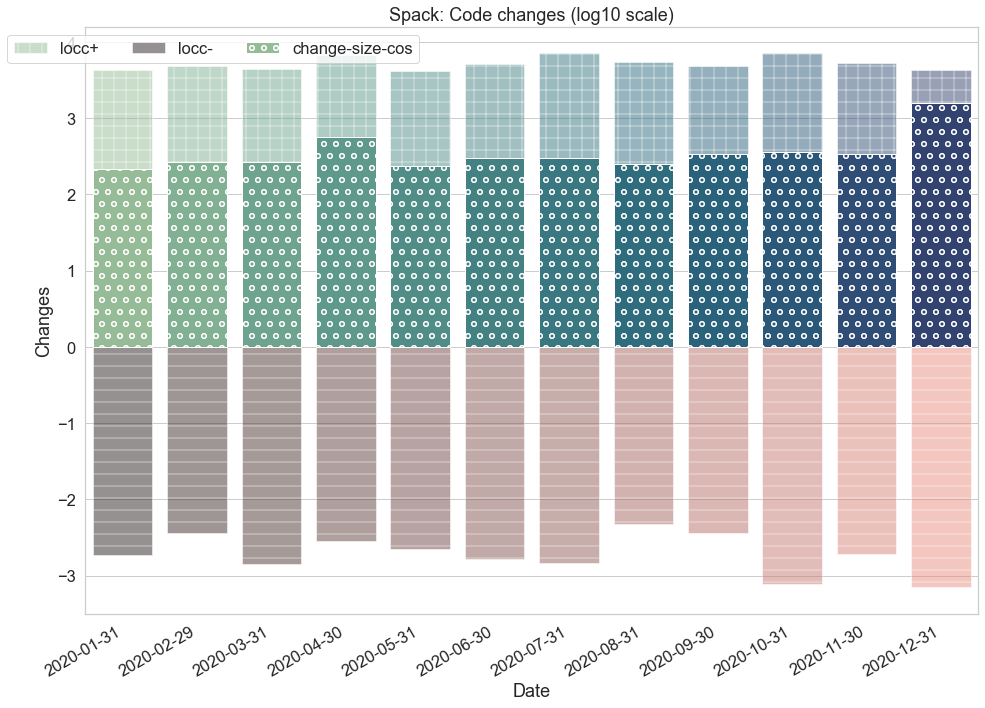

In [5]:
df = vis.plot_overall_project_locc(time_range='year',log=True)

similarly to plot for a given month, set *time_range='month'*

,year,month,day,doy,locc-basic,locc,locc-,locc+,change-size-cos,date
datetime,,,,,,,,,,
2020-07-01,20200,70,10,1830,365,351,-2.152288,2.290035,0.778151,2020-07-01
2020-07-02,40400,140,40,3680,161,146,-0.602060,2.103804,0.903090,2020-07-02
2020-07-03,10100,35,15,925,70,68,-0.000000,1.812913,0.301030,2020-07-03
2020-07-04,8080,28,16,744,141,135,-0.778151,2.089905,0.301030,2020-07-04
2020-07-05,34340,119,85,3179,84,64,inf,1.643453,0.954243,2020-07-05
2020-07-06,18180,63,54,1692,195,184,-0.602060,2.227887,0.845098,2020-07-06
2020-07-07,38380,133,133,3591,193,167,-0.000000,2.146128,1.079181,2020-07-07
2020-07-08,48480,168,192,4560,1190,1177,-0.602060,3.064458,0.698970,2020-07-08
2020-07-09,26260,91,117,2483,79,65,inf,1.707570,0.778151,2020-07-09


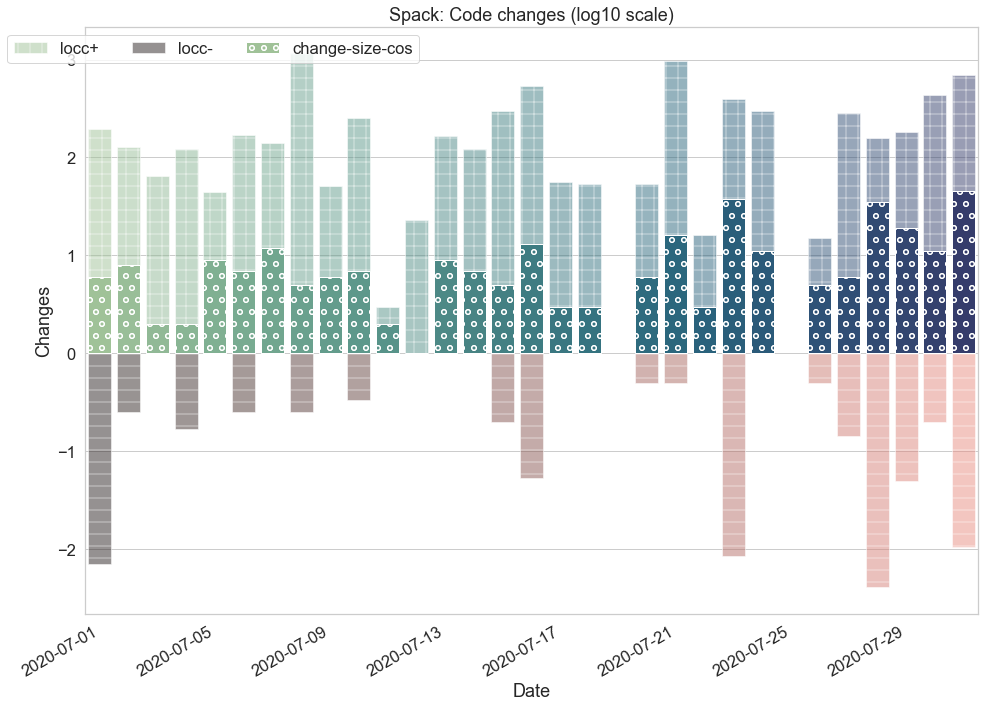

In [6]:
vis.plot_overall_project_locc(time_range='month',log=True)

### Averages: Total changed lines over time

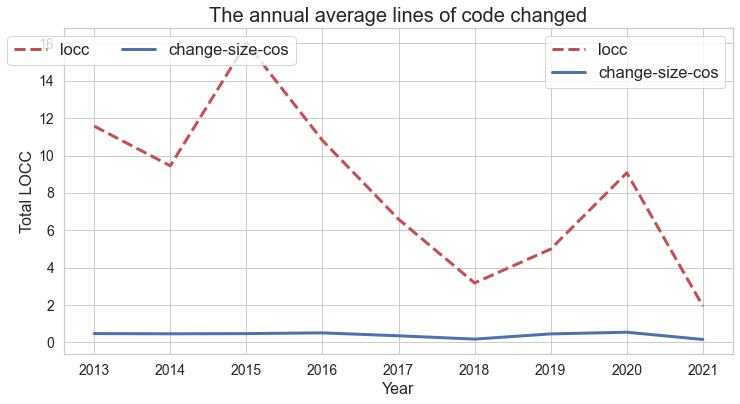

In [7]:
vis.plot_total_locc_avg()

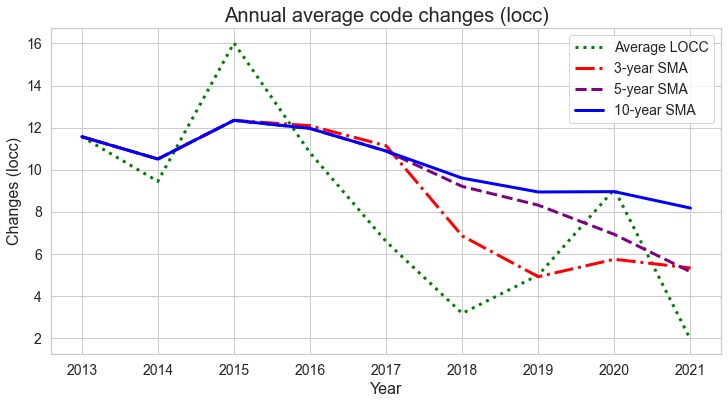

In [8]:
vis.plot_total_locc_moving_avgs()

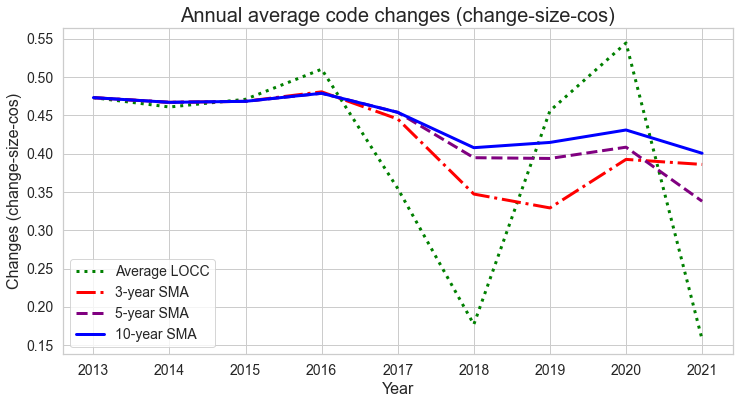

In [9]:
vis.plot_total_locc_moving_avgs(column='change-size-cos')

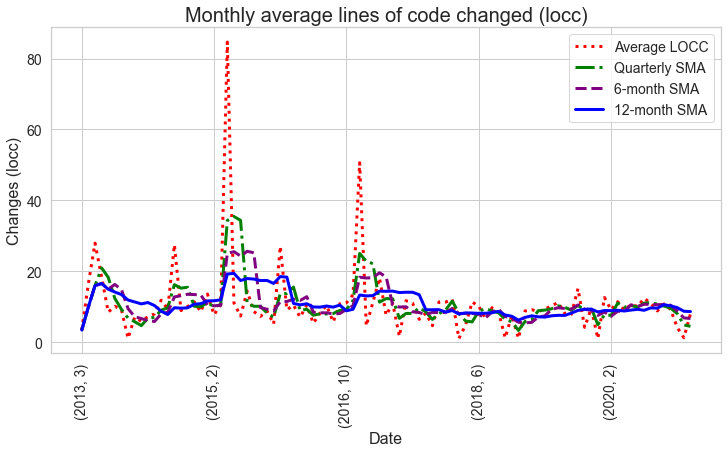

In [10]:
vis.plot_total_locc_moving_avgs_M()

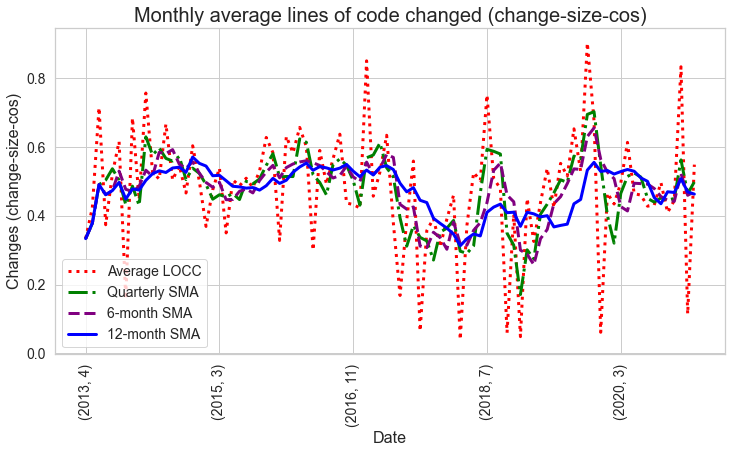

In [11]:
vis.plot_total_locc_moving_avgs_M(column='change-size-cos')

### Custom visualizations with derived data
This reflects changed lines of code as reported in git commit diffs.

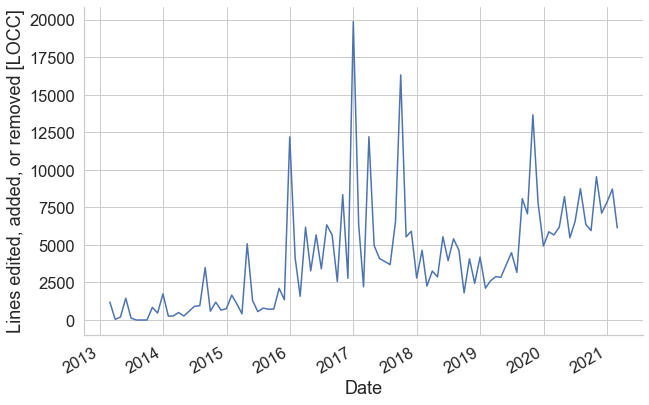

In [12]:
df = vis.plot_project_locc_line()

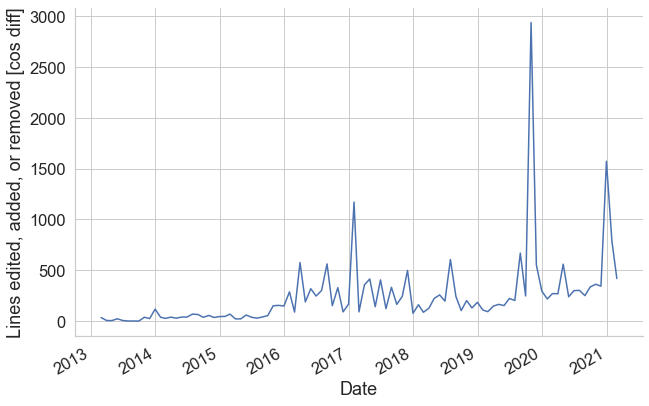

In [13]:
df2 = vis.plot_project_locc_line(locc=False)

,year,month,day,doy,locc-basic,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,,
2013-02-28 00:00:00+00:00,213378,212,1945,5231,1313,1193,39,1034,34
2013-03-31 00:00:00+00:00,24156,36,270,978,46,41,2,34,5
2013-04-30 00:00:00+00:00,24156,48,48,1128,216,198,19,161,4
2013-05-31 00:00:00+00:00,104676,260,612,6852,1491,1453,337,1078,22
2013-06-30 00:00:00+00:00,14091,42,203,1260,149,129,10,99,5


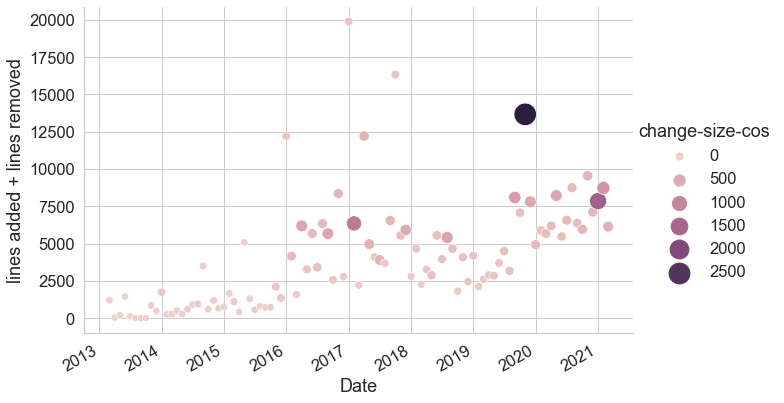

In [14]:
import seaborn as sns
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.relplot(data=df2, x="datetime", y="locc", size="change-size-cos", hue="change-size-cos", sizes=(50, 500),
                    height=6, aspect=1.5, kind="scatter")
    g.ax.set_xlabel('Date')
    g.ax.set_ylabel('lines added + lines removed')
    g.fig.autofmt_xdate()
    g.fig.show()
df.head()

### Using a distance metric to adjust the size of the changes

We use the python [textdistance](https://github.com/life4/textdistance) module. The following algorithms have been integrated with the visualizer.
```
'cos', 'hamming', 'damerau_levenshtein', 'jaccard', 'jaro', 'jaro_winkler', 'bag', 'editex'
```

,year,month,day,doy,locc-basic,locc,locc-,locc+,change-size-cos,change-size-jaccard
datetime,,,,,,,,,,
2013-02-28 00:00:00+00:00,213378,212,1945,5231,1313,1193,39,1034,34,34
2013-03-31 00:00:00+00:00,24156,36,270,978,46,41,2,34,5,5
2013-04-30 00:00:00+00:00,24156,48,48,1128,216,198,19,161,4,4
2013-05-31 00:00:00+00:00,104676,260,612,6852,1491,1453,337,1078,22,22
2013-06-30 00:00:00+00:00,14091,42,203,1260,149,129,10,99,5,5


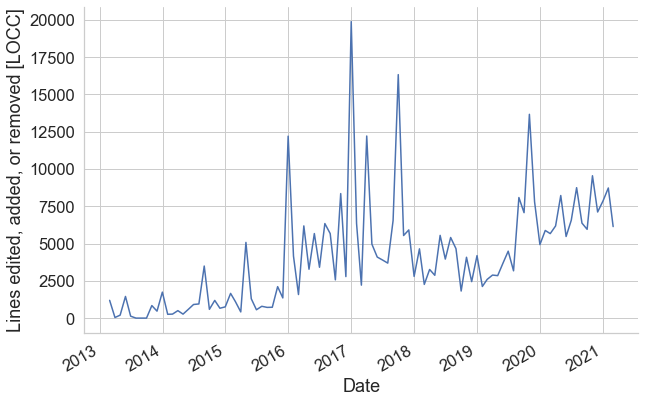

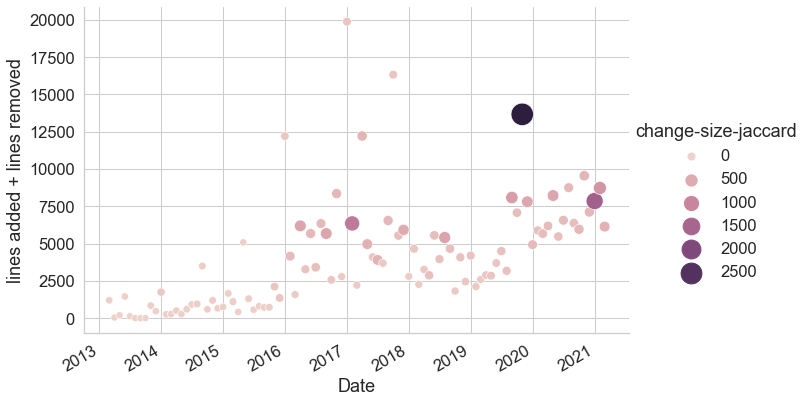

In [15]:
diff_alg = 'jaccard'
vis.set_diff_alg(diff_alg)
df = vis.plot_project_locc_line(diff_alg=diff_alg, log=False)
import seaborn as sns
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.relplot(data=df, x="datetime", y="locc", size="change-size-%s" % diff_alg, hue="change-size-%s" % diff_alg, sizes=(50, 500),
                    height=6, aspect=1.5, kind="scatter")
    g.ax.set_xlabel('Date')
    g.ax.set_ylabel('lines added + lines removed')
    g.fig.autofmt_xdate()
    g.fig.show()
df.head()

## Change size over time

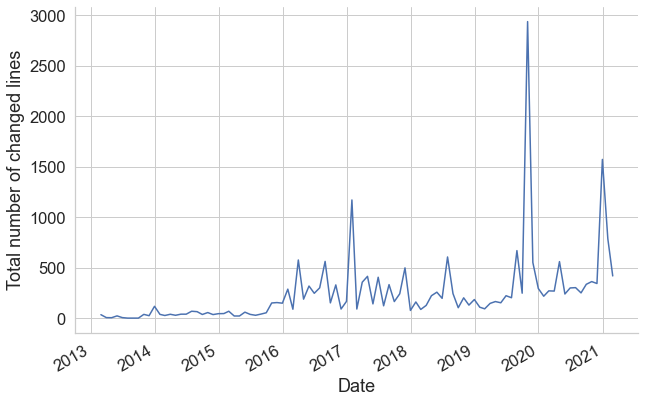

In [16]:
df = vis.plot_proj_change_size(time_range=None)

Similarly, we can 'zoom' into a specific year

(                              year  month    day     doy  locc-basic  locc  \
 datetime                                                                     
 2020-01-31 00:00:00+00:00   941320    466   7838    7838        6999  5879   
 2020-02-29 00:00:00+00:00  1256440   1244  10548   29830        6238  5668   
 2020-03-31 00:00:00+00:00  1092820   1623   9289   41749        7259  6183   
 2020-04-30 00:00:00+00:00  1844260   3652  14347   97430        9321  8223   
 2020-05-31 00:00:00+00:00  1040300   2575   7615   69930        6315  5475   
 2020-06-30 00:00:00+00:00  1313000   3900  11845  110645        7402  6564   
 2020-07-31 00:00:00+00:00  1426120   4942  14361  142853        9724  8750   
 2020-08-31 00:00:00+00:00  1171600   4640   9632  133172        7048  6373   
 2020-09-30 00:00:00+00:00  1363500   6075   9027  173727        6819  5956   
 2020-10-31 00:00:00+00:00  1785680   8840  15405  257621       10720  9550   
 2020-11-30 00:00:00+00:00  1559440   8492  11864  2

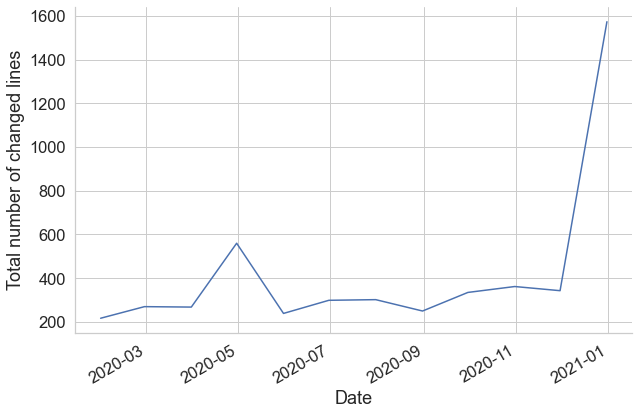

In [17]:
vis.plot_proj_change_size(time_range='year')

Or a specific year range

,year,month,day,doy,locc-basic,locc,locc-,locc+,change-size-cos,change-size-jaccard,date
datetime,,,,,,,,,,,
2013-03-31 00:00:00+00:00,237534,248,2215,6209,1359,1234,-1.612784,3.028571,39,1.591065,2013-03-31
2013-06-30 00:00:00+00:00,142923,350,863,9240,1856,1780,-2.563481,3.126456,31,1.491362,2013-06-30
2013-09-30 00:00:00+00:00,0,0,0,0,0,0,inf,-inf,0,-inf,2013-09-30
2013-12-31 00:00:00+00:00,674355,3776,5838,110309,3496,3050,-2.644439,3.335057,178,2.250420,2013-12-31
2014-03-31 00:00:00+00:00,718998,565,4004,10197,1213,1026,-2.278754,2.812245,101,2.004321,2014-03-31
2014-06-30 00:00:00+00:00,378632,980,3264,27101,2073,1771,-2.082785,3.129690,106,2.025306,2014-06-30
2014-09-30 00:00:00+00:00,594130,2324,5042,66466,5465,5032,-2.287802,3.643946,168,2.225309,2014-09-30
2014-12-31 00:00:00+00:00,531696,2874,3614,82852,2944,2604,-2.419956,3.301247,134,2.127105,2014-12-31
2015-03-31 00:00:00+00:00,612560,525,4429,11163,3512,3177,-2.645422,3.380211,134,2.127105,2015-03-31


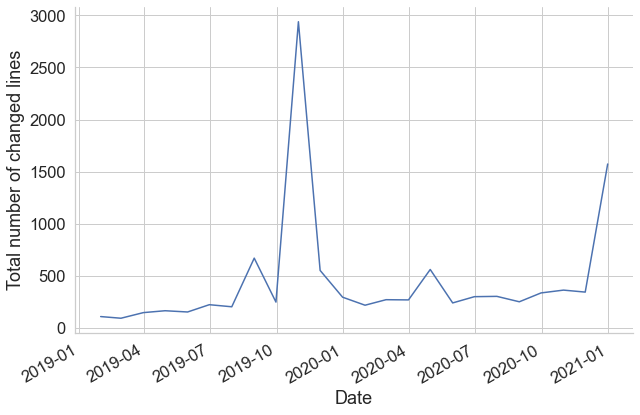

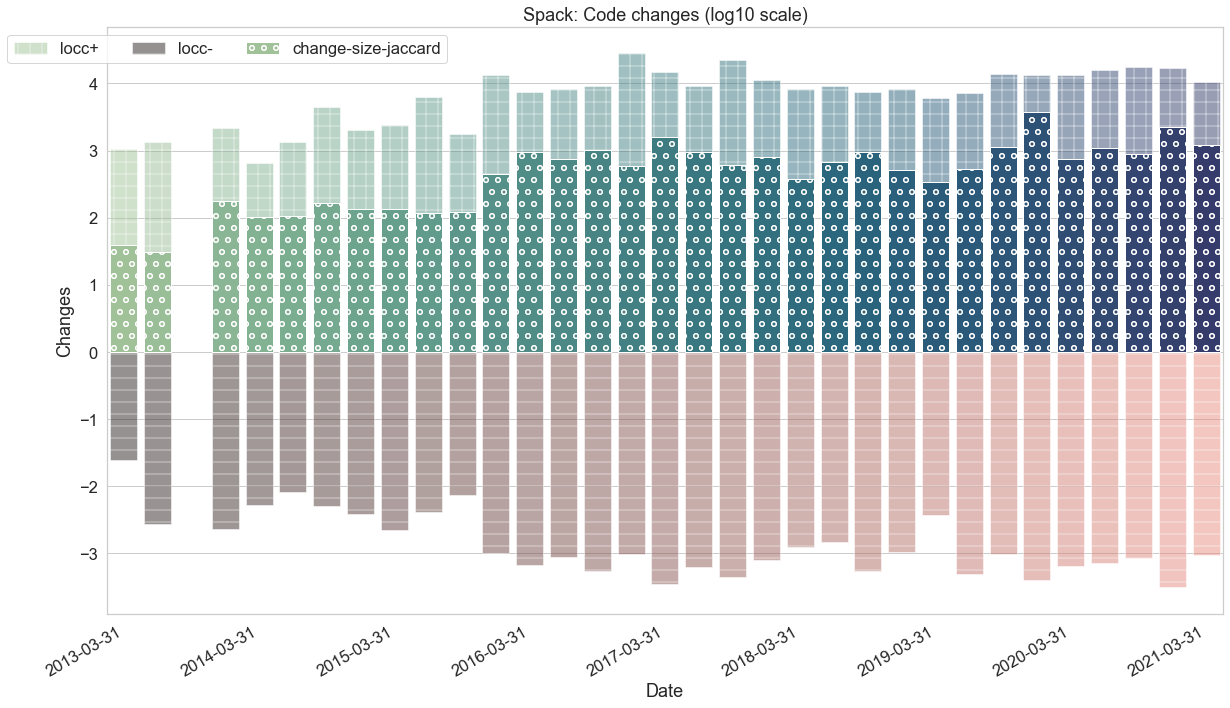

In [18]:
vis.select_year_range(2019,2020)
vis.plot_proj_change_size(time_range='year-year')
vis.plot_overall_project_locc(time_range='year-year',log=True)

we can zoom into a month

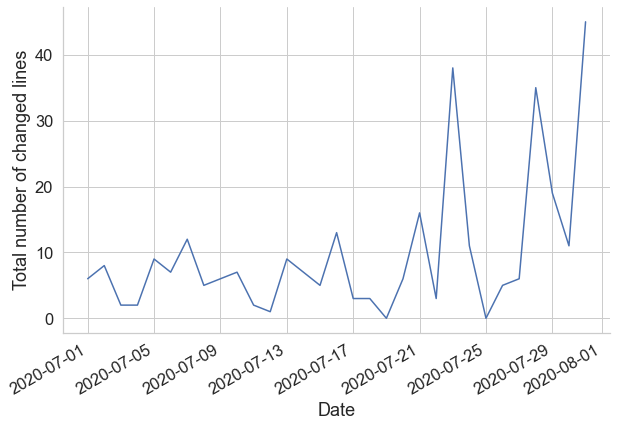

In [19]:
_ = vis.plot_proj_change_size(time_range='month')

Or a month range

(                              year  month    day     doy  locc-basic   locc  \
 datetime                                                                      
 2019-05-31 00:00:00+00:00   724821   1795   5478   48558        4191   3695   
 2019-06-30 00:00:00+00:00   811638   2412   6686   67388        5109   4490   
 2019-07-31 00:00:00+00:00   791448   2744   7129   78081        3704   3172   
 2019-08-31 00:00:00+00:00  2069475   8200  24194  241494       10294   8088   
 2019-09-30 00:00:00+00:00   942873   4203   7229  120710        7764   7073   
 2019-10-31 00:00:00+00:00  6575883  32570  41231  930392       21171  13671   
 2019-11-30 00:00:00+00:00  1645485   8965  17088  264848       10131   7806   
 2019-12-31 00:00:00+00:00        0      0      0       0           0      0   
 2020-01-31 00:00:00+00:00        0      0      0       0           0      0   
 2020-02-29 00:00:00+00:00        0      0      0       0           0      0   
 2020-03-31 00:00:00+00:00        0     

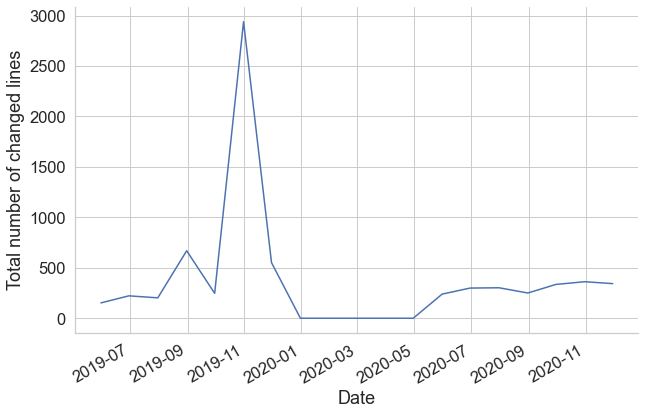

In [20]:
vis.select_month_range(5,11)
vis.plot_proj_change_size(time_range='month-month')

## More patterns
Here we look at a combination of the the high-churn and domain champion patterns. Basically we are focusing on the files that have the most changes and restricting the developers by those with the biggest contributions.

author,Todd Gamblin,Massimiliano Culpo,Adam J. Stewart,Peter Scheibel,Glenn Johnson,Patrick Gartung,Greg Becker,alalazo,darmac,Scott Wittenburg
filepath,,,,,,,,,,
lib/spack/exter...yaml/emitter.py,2019,0,0,0,0,0,0,0,0,0
lib/spack/exter...yaml/scanner.py,2410,0,0,0,0,0,0,0,0,0
lib/spack/spack.../environment.py,1297,173,22,108,0,0,238,373,0,0
lib/spack/spack/database.py,357,86,0,339,0,0,137,0,0,24
lib/spack/spack/package.py,1972,290,396,142,0,23,234,703,0,2


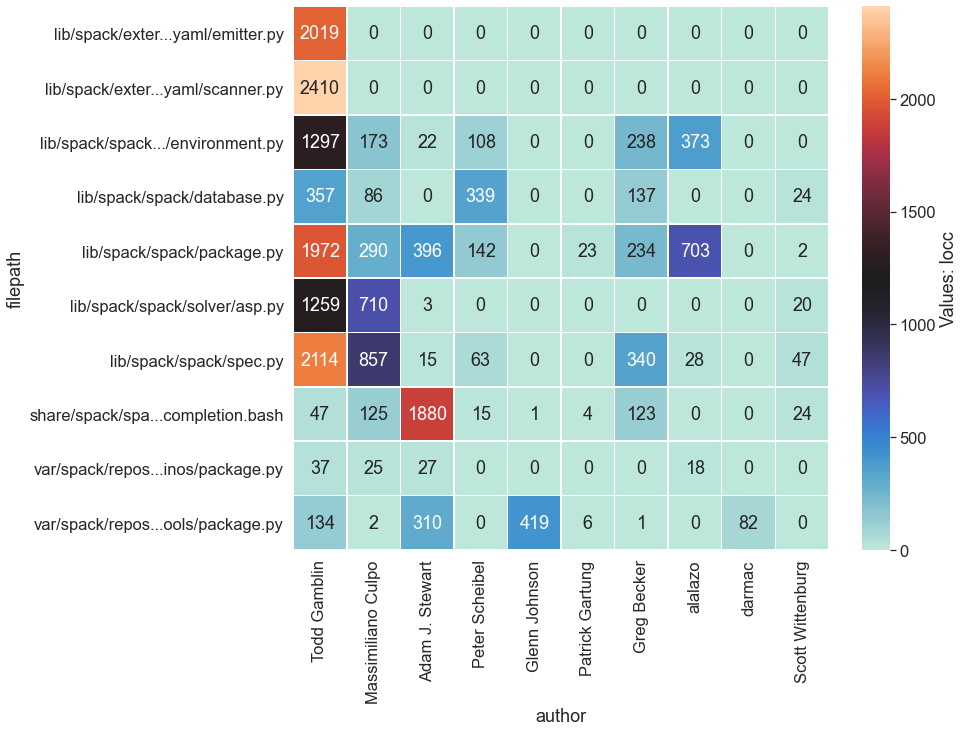

In [21]:
N = 10
vis.set_max_label_length(30)
top_N = vis.plot_top_N_heatmap(N, value_column='locc')
top_N.head()

author,Adam J. Stewart,Todd Gamblin,Glenn Johnson,Massimiliano Culpo,Michael Kuhn,Gregory Becker,Denis Davydov,Axel Huebl,alalazo,Elizabeth Fischer
filepath,,,,,,,,,,
lib/spack/spack.../environment.py,6,39,0,13,0,4,1,0,11,0
lib/spack/spack..._environment.py,16,35,0,11,0,21,4,0,11,1
lib/spack/spack...architecture.py,0,19,0,6,0,28,0,0,3,0
lib/spack/spack/package.py,24,169,0,27,0,6,1,1,35,5
lib/spack/spack/spec.py,5,132,0,35,1,44,0,0,3,2


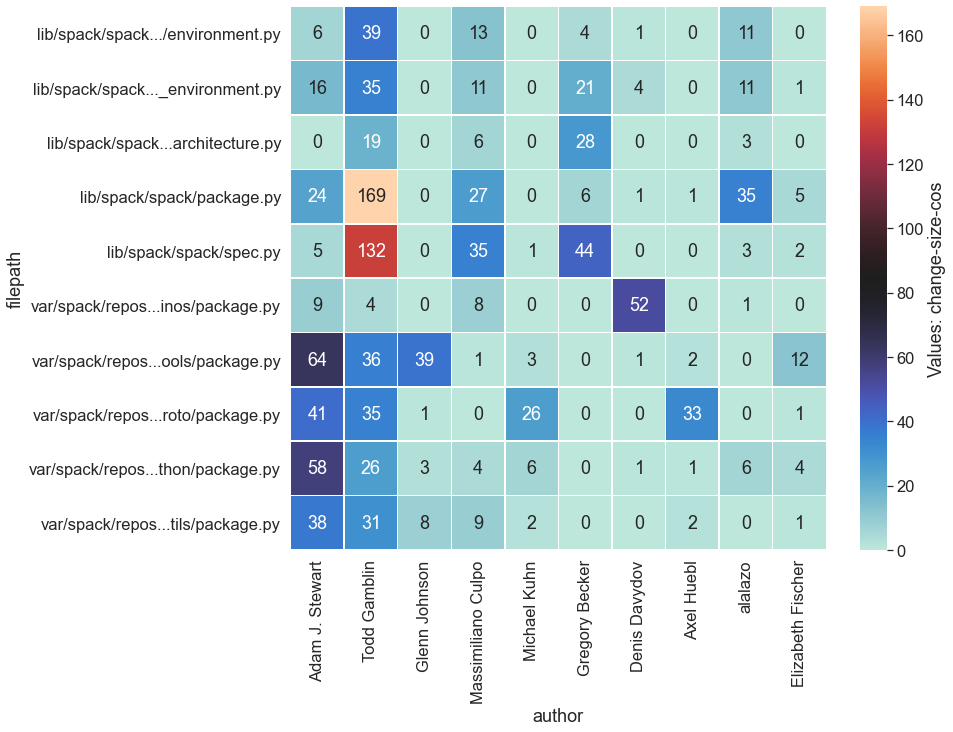

In [22]:
import seaborn as sns
top_N = vis.plot_top_N_heatmap(N, value_column='change-size-cos')
top_N.head()

In [23]:
from patterns.patterns import Patterns
df = vis.commit_data

In [24]:
vis.reset()
vis.annotate_metrics(diff_alg='cos')
file_dev_locc = vis.make_file_developer_df(value_column='locc')
file_dev_diff = vis.make_file_developer_df(value_column='change-size-cos')

In [25]:
diff_df = file_dev_locc.sub(file_dev_diff, axis=0)
print(diff_df.shape)
diff_df.head()

(4652, 806)


author,0t1s1,AMD Toolchain Support,AP97,Aaron Fisher,Abhinav Bhatele,Abhishek Kulkarni,Adam Fidel,Adam J. Stewart,Adam Lyon,Adam Moody,...,wspear,xfzhao,yellowhat,ynanyam,zenln,zhiyuanzhai,zorun,zschulte,健美猞猁,健美猫
filepath,,,,,,,,,,,,,,,,,,,,,
.codecov.yml,NaN,0.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
.github/actions...s/entrypoint.py,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.github/dependabot.yml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.github/workflo...acos_python.yml,NaN,0.0,NaN,0.0,0.0,0.0,NaN,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
.github/workflo...e_and_docs.yaml,NaN,0.0,NaN,0.0,0.0,0.0,NaN,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


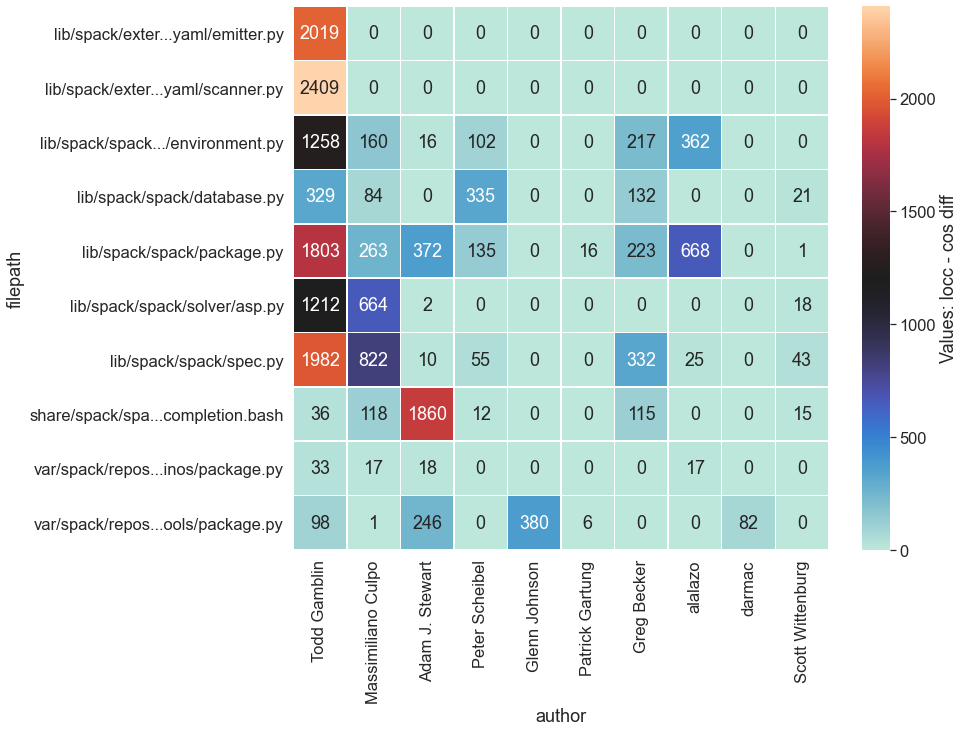

In [26]:
df = vis.commit_data
df['locc - cos diff'] = df['locc']-df['change-size-cos']
d = vis.plot_top_N_heatmap(top_N = 10, value_column='locc - cos diff', my_df=df)

## Did anything unusual happen in 2020?


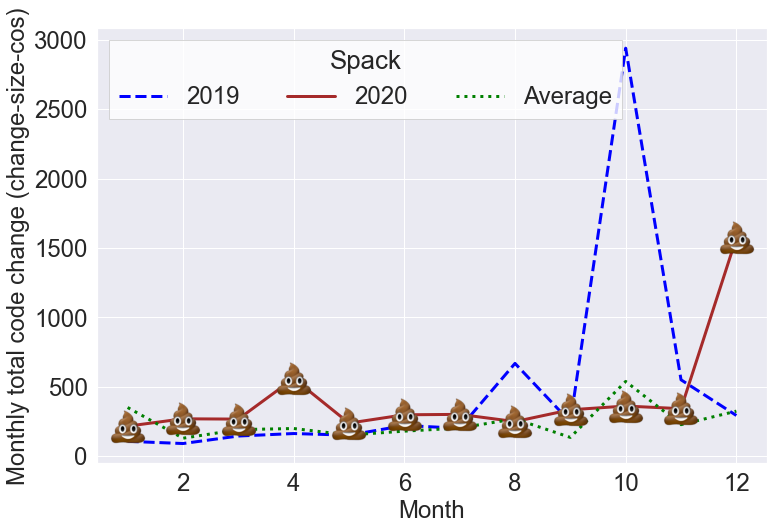

In [27]:
vis.how_was_2020('change-size-cos')

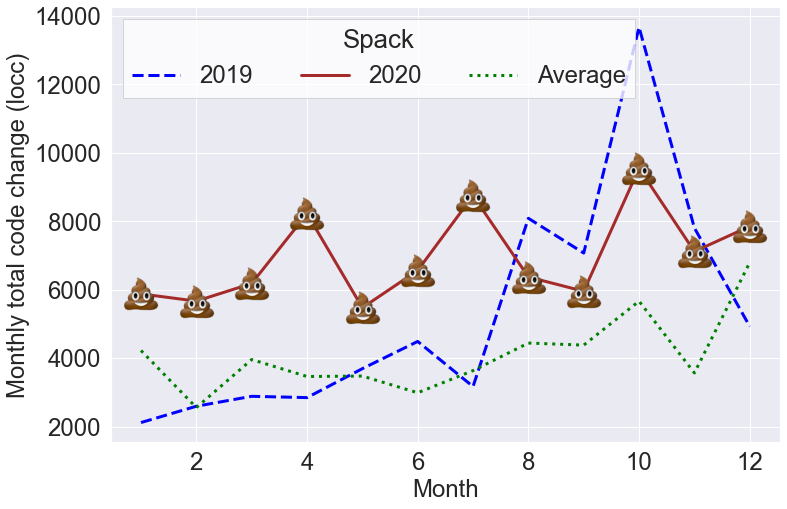

In [28]:
vis.how_was_2020('locc')